## Problem 2)

### Problem 2a)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from PIL import Image

In [2]:
import networkx as nx
import itertools
from sklearn.datasets.samples_generator import make_blobs
import random
from scipy.sparse import csr_matrix
from scipy.linalg import eigh

In [3]:
img=mpimg.imread('Neuschwanstein_small.png')
img = img [:,:,:3] # remove the fourth coordinate alpha

In [4]:
img=img.reshape(150000,3)

In [5]:
kmeans = KMeans(n_clusters=64, init='k-means++')
kmeans.fit(img)
y_kmeans = kmeans.predict(img)

In [6]:
centers = kmeans.cluster_centers_*255//1

In [7]:
centersTuple=tuple([int(x) for x in centers.flatten().tolist()])

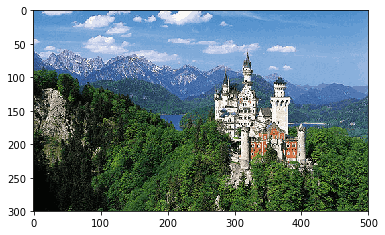

In [8]:
img = Image.new('P', (500, 300))
img.putpalette(centersTuple)
img.putdata(y_kmeans.tolist())
plt.imshow(img)

In [9]:
img.save('compressedImage.png')

### Problem 2b)

In [10]:
img=mpimg.imread('Neuschwanstein_large.png')
img = img [:,:,:3] # remove the fourth coordinate alpha

In [11]:
img=img.reshape(1032*1376,3)

In [12]:
mbkmeans = MiniBatchKMeans(n_clusters= 64, batch_size =10000)
mbclusters = mbkmeans.fit_predict(img)

In [13]:
mbcenters = mbkmeans.cluster_centers_*255//1

In [14]:
centersTuple=tuple([int(x) for x in mbcenters.flatten().tolist()])

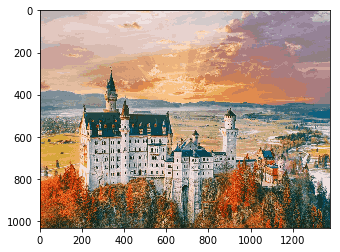

In [15]:
img = Image.new('P', (1376,1032))
img.putpalette(centersTuple)
img.putdata(mbclusters.tolist())
plt.imshow(img)

In [16]:
img.save('compressedLargeImage.png')

### Problem 3)

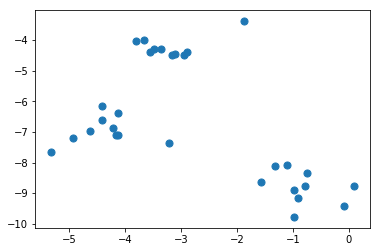

In [17]:
X, y = make_blobs(n_samples=30, centers=3, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [18]:
G=nx.Graph()

In [19]:
xTuples=[tuple(x) for x in X.tolist()]

In [20]:
G.add_nodes_from(xTuples)

In [21]:
groups=[[],[],[]]
for i,group in enumerate(y):
    groups[group].append(xTuples[i])

In [22]:
for group in groups:
    for pair in itertools.combinations(group, 2):
        x=random.random()
        if x<0.8:
            G.add_edge(*pair)

In [23]:
x=0
for pair in itertools.combinations(groups, 2):
    allCombinations=list(itertools.product(pair[0], pair[1]))
    for combination in allCombinations:
        x=random.random()
        if x<0.05:
            G.add_edge(*combination)

In [24]:
L = nx.laplacian_matrix(G)
L = csr_matrix.todense(L)

In [25]:
vals, vecs = eigh(L)

/Users/seo/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/seo/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/seo/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/seo/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprec

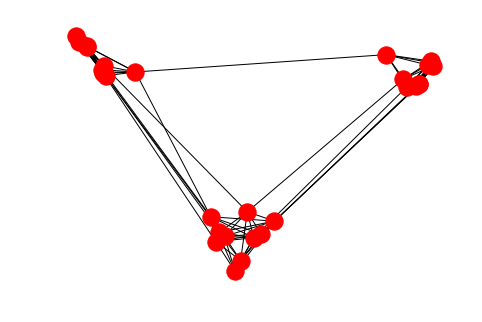

In [26]:
pos = {}
print(enumerate(nx.nodes(G)))
for i,v in enumerate(nx.nodes(G)):
    pos[v] = vecs[i,1:3]
nx.draw(G, pos = pos)